# Baseline ~ Sex

In [3]:
# import libraries and filter warnings
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data
train = pd.read_csv(r'../Resources/Data/baseline_train_data.csv')
test = pd.read_csv(r'../Resources/Data/baseline_test_data.csv')
valid = pd.read_csv(r'../Resources/Data/baseline_valis_data.csv')

target = 'two_year_recid'

# Separate features and target for training, testing, and validation data
X_train = train.drop(columns=[target])
y_train = train[target]

X_test = test.drop(columns=[target])
y_test = test[target]

X_valid = valid.drop(columns=[target])
y_valid = valid[target]

In [5]:
# Define privileged and unprivileged groups
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

In [6]:
# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_test = log_reg.predict(X_test)

Test Accuracy: 0.6502525252525253


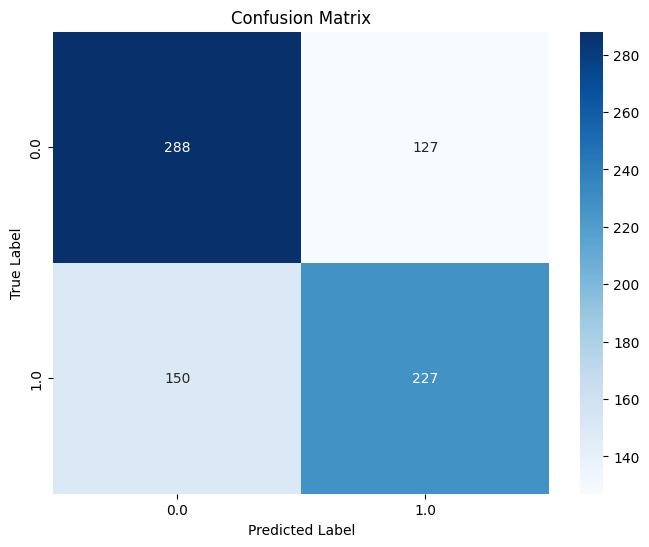

In [7]:
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Combine predicted labels with the test features
test_with_pred = X_test.copy()
test_with_pred[target] = y_test
test_with_pred['y_pred'] = y_pred_test

In [9]:
# Convert to AIF360 BinaryLabelDataset format
test_aif = BinaryLabelDataset(df=pd.concat([X_test, y_test], axis=1),
                              label_names=[target],
                              protected_attribute_names=['sex'])

test_aif_pred = BinaryLabelDataset(df=pd.concat([X_test, pd.Series(y_pred_test, name=target)], axis=1),
                                   label_names=[target],
                                   protected_attribute_names=['sex'])

In [10]:
# Compute fairness metrics
metric_test_pred = ClassificationMetric(test_aif, test_aif_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)

stat_parity_diff = metric_test_pred.statistical_parity_difference()
avg_odds_diff = metric_test_pred.average_odds_difference()
equal_opp_diff = metric_test_pred.equal_opportunity_difference()

# Display results
print(f"Statistical Parity Difference: {stat_parity_diff}")
print(f"Average Odds Difference: {avg_odds_diff}")
print(f"Equal Opportunity Difference: {equal_opp_diff}")

Statistical Parity Difference: 0.23776896724277302
Average Odds Difference: 0.22409495346851444
Equal Opportunity Difference: 0.22007930785868784
